In [1]:
!python -m pip install git+https://github.com/huggingface/transformers

Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-3086oze7
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-3086oze7
  Resolved https://github.com/huggingface/transformers to commit c8c8dffbe45ebef0a8dba4a51024e5e5e498596b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for huggingface-hub<1.0,>=0.24.0 from https://files.pythonhosted.org/packages/44/5a/dc6af87c61f89b23439eb95521e4e99862636cfd538ae12fd36be5483e5f/huggingface_hub-0.26.5-py3-none-any.whl.metadata
  Obtaining dependency information for regex!=2019.12.17 from https://files.pythonhosted.org/packages/f2/98/26d3830875b53071f1f0ae6d547f1d98e964dd29ad35cbf94439120bb67a/regex-2024.11.6-cp310-cp310-manylinux_2_17_x8

In [2]:
pip install accelerate>=0.12.0

Note: you may need to restart the kernel to use updated packages.


Loading processor and model...


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Processor and model loaded successfully.
Loading image from datasett/datasetUML1.png...


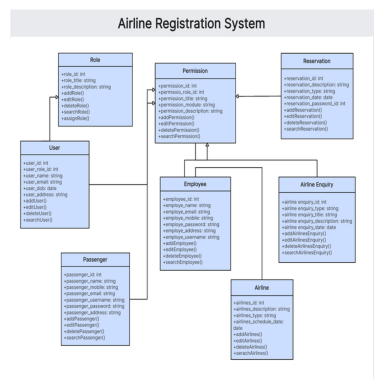

Preparing image and text prompt...
Inputs prepared successfully.
Generating response from model...

Generated response:
system
You are a helpful assistant.
user
 what is passenger in this diagram ? 
assistant
In the given UML diagram, the "Passenger" class is part of the "Airline Registration System" domain model. The "Passenger" class has the following attributes and methods:

### Attributes:
- `passenger_id: int`
- `passenger_name: string`
- `passenger_email: string`
- `passenger_mobile: string`
- `passenger_username: string`
- `passenger_password: string`
- `passenger_address: string`

### Methods:
- `addPassenger()`
- `editPassenger()`
- `deletePassenger()`
- `searchPassenger()`

These attributes and methods are used to manage information about passengers in the airline registration system.

Execution Time: 4.21 seconds


In [2]:
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor
import torch
from PIL import Image
import matplotlib.pyplot as plt
import time  # Import time module to measure execution time

# Step 1: Load the processor and model
print("Loading processor and model...")

# Load the processor and model from pre-trained weights
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct")

# Load the model with float16 precision and transfer it to GPU
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct", 
    trust_remote_code=True, 
    torch_dtype=torch.float16,  # Using float16 precision for GPU
    low_cpu_mem_usage=True
)
model.to("cuda:0")  # Move model to GPU

print("Processor and model loaded successfully.")

# Step 2: Load and display the image
image_path = "1.jpg"  # Specify your image path
print(f"Loading image from {image_path}...")

# Open the image
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Step 3: Prepare the image and text prompt, using the appropriate prompt template
print("Preparing image and text prompt...")

# Define a chat history with both text and image prompts
conversation = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "- what are the public methods of class 'MemberManager' give me detail? "},  # Text query
            {"type": "image"}  # Image to be processed
        ],
    },
]

# Apply the chat template to format the prompt correctly
prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

# Prepare inputs for the model (convert to tensors and move to GPU)
inputs = processor(images=image, text=prompt, return_tensors="pt").to("cuda:0")

print("Inputs prepared successfully.")

# Step 4: Generate the output based on the inputs
print("Generating response from model...")

# Measure execution time
start_time = time.time()  # Start the timer

# Perform autoregressive text generation based on the inputs
output = model.generate(**inputs, max_new_tokens=600)

# Record the end time
end_time = time.time()  # End the timer

# Decode the generated output and print the response
decoded_output = processor.decode(output[0], skip_special_tokens=True)

# Print the generated response
print("\nGenerated response:")
print(decoded_output)

# Print the execution time
execution_time = end_time - start_time
print(f"\nExecution Time: {execution_time:.2f} seconds")
